In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
spotify_23 = pd.read_csv('spotify_23.csv')
spotify_23.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


In [3]:
#load the dataset
songs = pd.read_csv("spotify_23.csv")
songs.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


We can already see that our potential target variables can be "streams". Through linear regressions, we can understand how to predict such feature numerically. Moreover, there are many features that can be interesting in determing that target variables. However, we will need to standardize most of them, and to convert some of them into numeric values.

In [4]:
#Let's the Dtype of the features, since sometimes features that appear numeric, have a string value.
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   859 non-null    ob

In [5]:
#Let's check for duplicates. We are going to do so specifically in the "track_name" column.
# Check for duplicates based on both 'track_name' and 'artist(s)_name'
duplicate = songs[songs.duplicated(['track_name', 'artist(s)_name'], keep=False)]
duplicate.count()

track_name              8
artist(s)_name          8
artist_count            8
released_year           8
released_month          8
released_day            8
in_spotify_playlists    8
in_spotify_charts       8
streams                 8
in_apple_playlists      8
in_apple_charts         8
in_deezer_playlists     8
in_deezer_charts        8
in_shazam_charts        8
bpm                     8
key                     6
mode                    8
danceability_%          8
valence_%               8
energy_%                8
acousticness_%          8
instrumentalness_%      8
liveness_%              8
speechiness_%           8
dtype: int64

In [6]:
#There are 10 duplicates, let's see them.
duplicate

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
178,SNAP,Rosa Linn,1,2022,3,19,3202,18,726307468,148,...,170,NaN,Major,56,53,64,11,0,45,6
345,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,629,14,303216294,32,...,94,G#,Major,73,65,79,5,2,11,6
372,About Damn Time,Lizzo,1,2022,7,15,2332,2,723894473,0,...,109,A#,Minor,84,72,74,10,0,34,7
482,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854,1,...,166,C#,Major,70,57,57,9,20,11,7
512,Take My Breath,The Weeknd,1,2021,8,6,2597,0,130655803,17,...,121,A#,Minor,70,35,77,1,0,26,4
616,Take My Breath,The Weeknd,1,2021,8,6,6392,0,432702334,174,...,121,G#,Major,75,53,74,2,0,11,5
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,...,109,A#,Minor,84,72,74,10,0,34,7
873,SNAP,Rosa Linn,1,2022,3,19,1818,0,711366595,3,...,170,NaN,Major,56,52,64,11,0,45,7


In [7]:
#We shall remove the duplicates and keep the row with the higher amount of streams.
songs = songs.sort_values(by='streams', ascending=False).drop_duplicates(['track_name', 'artist(s)_name'], keep='first')
duplicate = songs[songs.duplicated(['track_name', 'artist(s)_name'], keep=False)]
duplicate.count()


track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

Brilliant, we have removed the duplicates.

We see that "streams", our target value is a string, such as "in_deezer_playlists", and "in_shazam_charts", and they should all be integers instead.

Text(0.5, 1.0, 'Total Missing Values')

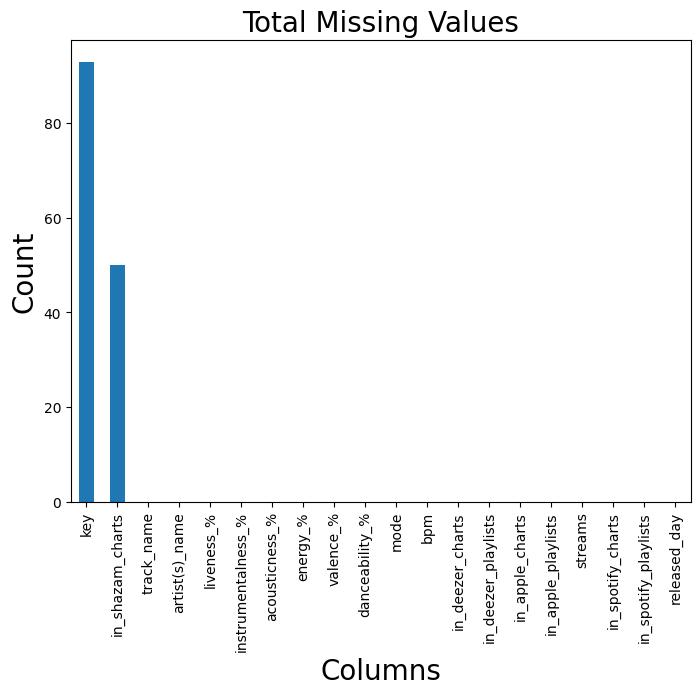

In [8]:
#Let's look for null values, since some null values might be preventing certain features from being seen as numeric.
#Now we will see if there is missing value, even if we have already filled the missing values above
total_missing = songs.isnull().sum().sort_values(ascending=False)
total_missing_select = total_missing.head(20)
total_missing_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

Luckily, we have only two features containing missing values. Regarding "in_shazam_charts", we can substitute null and "Null" values with 0, since that null most likely means that the song is in 0 playlists. On the other hand, the "key" feature is a bit more complicated, and for the moment we can substitute "Null" to key. However, we should unferstand what rows have missing values in "key". Those rows migh be of low quality data, and it that case they should be dropped, or they might just miss "key", and then should be kept.

In [9]:
null_key = songs[(songs['key'].isnull()) | (songs['key'] == "Null")]
null_key.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
603,HEARTBREAK ANNIVERSARY,Giveon,1,2020,2,21,5398,4,951637566,111,...,129,NaN,Major,61,59,46,56,0,13,5
151,Bye,Peso Pluma,1,2023,5,26,324,14,95053634,13,...,122,NaN,Major,78,70,81,57,0,10,5
464,Special,SZA,1,2022,12,9,906,0,88092256,6,...,76,NaN,Major,60,19,20,78,0,11,5
59,cardigan,Taylor Swift,1,2020,7,24,7923,29,812019557,106,...,130,NaN,Minor,61,53,58,55,0,27,4
395,Space Song,Beach House,1,2015,1,1,17852,4,789753877,69,...,147,NaN,Minor,51,62,79,22,13,14,3


We can see that the even when the "key" value is missing, the rest of the data is intact, and oddly enough the "mode" is still present, so we will keep those rows.

In [10]:
null_shazam_chart = songs[(songs['in_shazam_charts'].isnull()) | (songs['in_shazam_charts'] == "Null")]
null_shazam_chart.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
625,Arcade,Duncan Laurence,1,2019,3,7,6646,0,991336132,107,...,72,A,Minor,45,27,33,82,0,14,4
243,Unstoppable,Sia,1,2016,1,21,7681,13,939844851,119,...,174,A,Major,47,27,78,11,0,10,8
159,Under The Influence,Chris Brown,1,2019,10,4,3859,26,929964809,133,...,117,A,Minor,73,31,69,6,0,11,4
529,MONEY,Lisa,1,2021,9,10,2566,13,863625566,44,...,140,C#,Minor,83,40,55,16,0,14,23
446,Santa Tell Me,Ariana Grande,1,2013,12,13,9408,0,834129063,231,...,133,G,Major,46,53,63,5,0,30,18


In [11]:
songs['in_shazam_charts'].replace("Null", 0, inplace=True)
songs['in_shazam_charts'].fillna(0, inplace=True)

#Regarding "key", we will use a "no_data" category instead of the classic "Null", to specify that the songs has a key but we don't have a data entry.
songs['key'].fillna("no_data", inplace=True)

Text(0.5, 1.0, 'Total Missing Values')

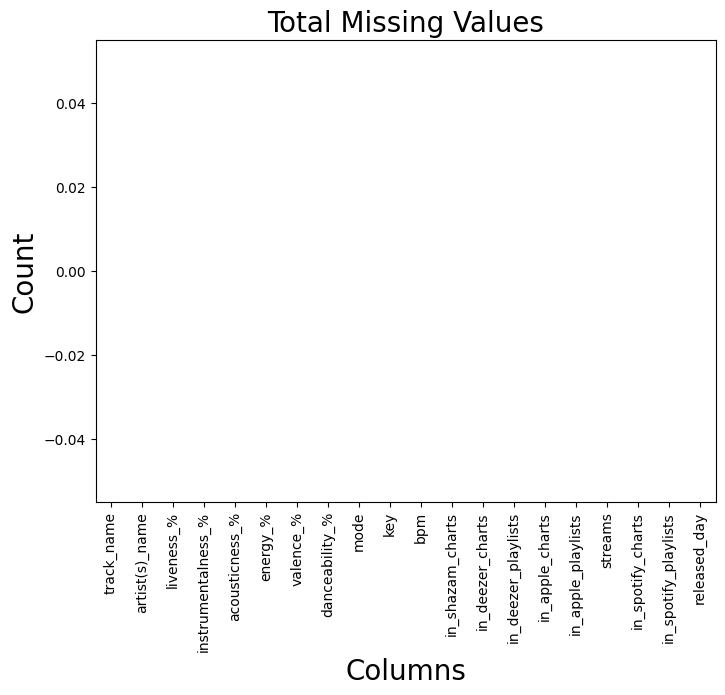

In [12]:
#Let's check for missing values again
total_missing = songs.isnull().sum().sort_values(ascending=False)
total_missing_select = total_missing.head(20)
total_missing_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

Now we don't have any NaN value, amazing!

Now it's time to convert all the numeric columns into numbers, before we procede with standardization. But before, let's see if there is any "Null" string.

Text(0.5, 1.0, 'Total Missing Values')

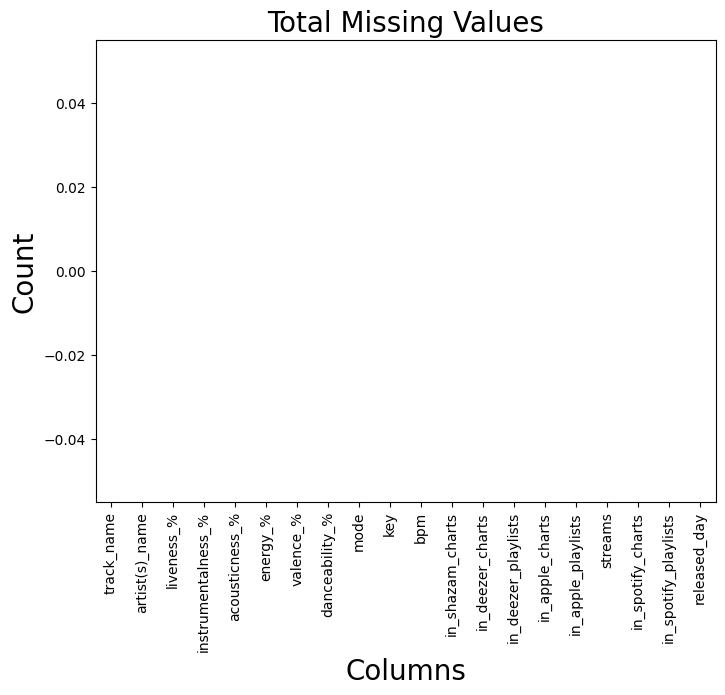

In [13]:
#Let's check for missing values again
total_missing = songs[(songs == 'Null')].sum().sort_values(ascending=False)
total_missing_select = total_missing.head(20)
total_missing_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [14]:
#No "Null" string has been found, let's convert the remaining features into numbers.
# Select the columns
columns_to_convert = ["streams", "in_deezer_playlists", "in_shazam_charts"]

# Convert selected columns to int
songs[columns_to_convert] = songs[columns_to_convert].apply(pd.to_numeric, errors='coerce').fillna(0).astype('int64')

#Let's check the dataset again
songs.info()



<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 574 to 301
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            949 non-null    object
 1   artist(s)_name        949 non-null    object
 2   artist_count          949 non-null    int64 
 3   released_year         949 non-null    int64 
 4   released_month        949 non-null    int64 
 5   released_day          949 non-null    int64 
 6   in_spotify_playlists  949 non-null    int64 
 7   in_spotify_charts     949 non-null    int64 
 8   streams               949 non-null    int64 
 9   in_apple_playlists    949 non-null    int64 
 10  in_apple_charts       949 non-null    int64 
 11  in_deezer_playlists   949 non-null    int64 
 12  in_deezer_charts      949 non-null    int64 
 13  in_shazam_charts      949 non-null    int64 
 14  bpm                   949 non-null    int64 
 15  key                   949 non-null    objec

In [15]:
#Now that all the selected features are "int64", we can describe the dataset before proceding with standardization.
songs.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,9.490000e+02,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000,949.000000
mean,1.558483,2018.223393,6.029505,13.914647,5214.329821,12.057956,5.137946e+08,68.075869,52.043203,100.915701,2.677555,47.920969,122.460485,66.956797,51.420443,64.263435,27.139094,1.566913,18.167545,10.147524
std,0.894194,11.137264,3.569558,9.199505,7911.050721,19.602856,5.677431e+08,86.526736,50.644446,174.199323,6.045828,123.081981,28.035537,14.646007,23.513872,16.575557,26.019257,8.405782,13.698546,9.930207
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,1.413817e+08,13.000000,7.000000,8.000000,0.000000,0.000000,99.000000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,2.881017e+08,34.000000,39.000000,31.000000,0.000000,2.000000,120.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5669.000000,16.000000,6.726562e+08,88.000000,87.000000,100.000000,2.000000,32.000000,140.000000,78.000000,70.000000,77.000000,43.000000,0.000000,23.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,974.000000,58.000000,953.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


Our bojective is to predict the number of streams by using the continuous dependent variable "streams". In implementing the linear regression model, we will see what variables will influence "streams" the most and come up with a model.

Before training our model, we wil do three things:
- Look at the distribution of our target feature, "streams". We want to analyse the distribution and deal with potential outliers.
- Encode "key" and "mode" into numbers
- Standardize our independent variables by selecting an appropriate method.
- Look at the correlation of the dependent variable with the independent variables both visually and statistically.

Now we will analize the distribution of the dependent variable through both visual and statistical methods.

<Axes: >

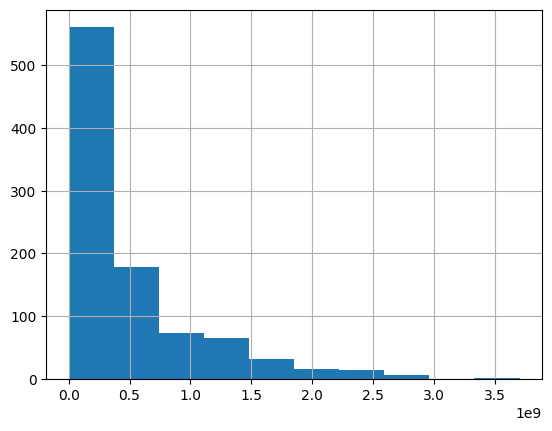

In [16]:
songs.streams.hist()

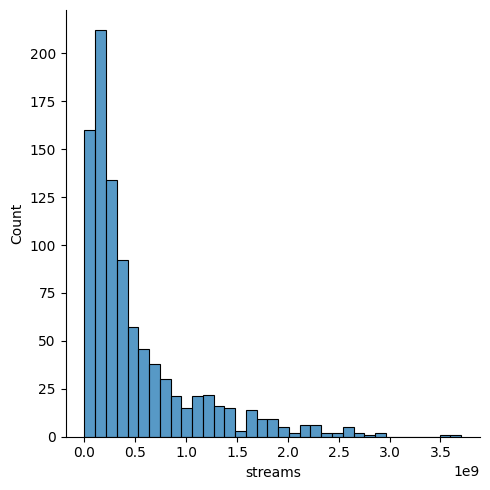

In [17]:
#Let's plot it with seaborn too, for a higher visual quality.
sns.displot(songs['streams'])

In [18]:
print("Skewness: %f" % songs['streams'].skew())

Skewness: 1.998866


We can see that the dataset is heavily skewed to the right. Let's try to log transform it. However, before, we need to deal with the rows that contain 0 "streams", since they won't work with log transformation.

In [19]:
zero_streams = songs[songs['streams'] == 0]
zero_streams.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,0,16,...,110,A,Major,53,75,69,7,0,17,3


There is probably a data entry error for this columns, and we can remove it.

In [20]:
songs = songs[songs['streams'] > 0]
print("Skewness: %f" % songs['streams'].skew())

Skewness: 1.998325


In [21]:
log_transformed_streams = np.log(songs['streams'])
print("Skewness: %f" % log_transformed_streams.skew())

Skewness: -1.185063


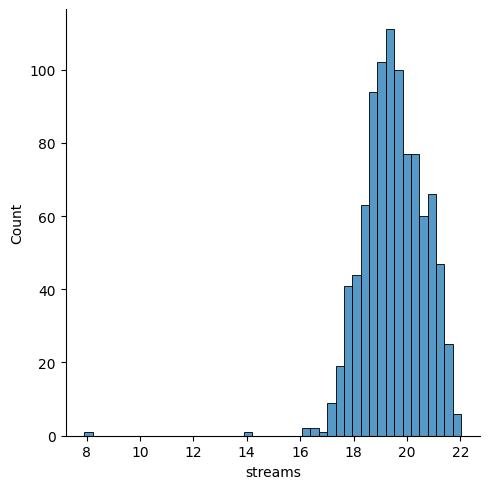

In [22]:
sns.displot(log_transformed_streams)

This is still not enough, but we can see that if we keep only the values above 16, we are going to have a normal distribution.

We shall make a new dataframe, before fitlering, so we can work on the new dataframe without impacting the old one.

In [23]:
#Let's save the new songs dataframe into a pickle file
#so we don't have redo the previous steps each time we restart the kernel
songs.to_pickle("songs.pkl")

#Let's copy the dataframe
songs_2 = songs.copy()

In [24]:
songs_2['log_transformed_streams'] = np.log(songs_2['streams'])

# Filter rows where 'log_transformed_streams' is greater than 16
songs_2 = songs_2[songs_2['log_transformed_streams'] > 16]

# Display or check if the 'transformed_streams_sixteen' DataFrame is correct
print(log_transformed_streams)

33     20.723014
625    20.714564
253    20.711715
455    18.407690
98     20.706768
         ...    
366    20.745280
744    18.438325
515    18.431769
500    20.730849
301    18.424769
Name: streams, Length: 948, dtype: float64


In [25]:
print("Skewness: %f" % songs_2['log_transformed_streams'].skew())

Skewness: -0.036266


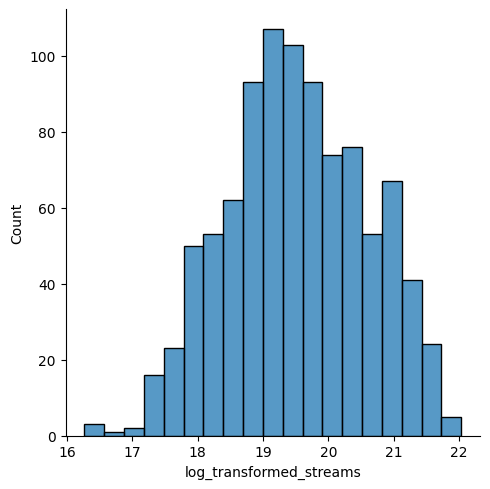

In [26]:
sns.displot(songs_2['log_transformed_streams'])

We have a normal distribution of our target variable, and we can append it to the dataset as a separate column. However, we need to be careful when we transform the target variable, because we will need to revert to the original format later on, if we want to understand the predicted values of the target variable.

In [27]:
#Let's try to revert the log to see if the distribution is still normal.
songs_2['original_streams'] = np.exp(songs_2['log_transformed_streams'])
print("Skewness: %f" % songs_2['original_streams'].skew())

Skewness: 1.997241


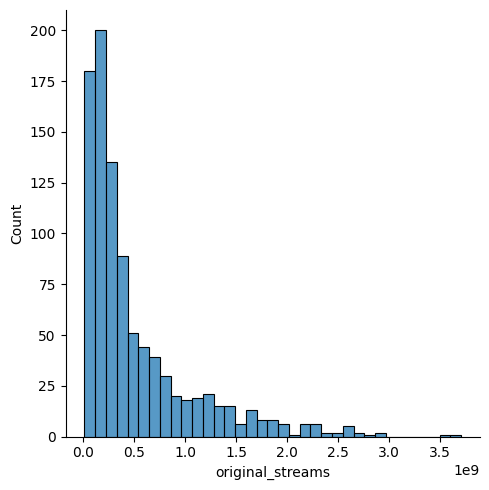

In [28]:
sns.displot(songs_2['original_streams'])

Apparently, removing a few outliers was not enough, so let's keep the "log_transformed_streams" as dependent variable.

In [118]:
songs_2.to_pickle("songs_2.pkl")

In [2]:
songs_2 = pd.read_pickle('songs_2.pkl')

As an exercise, we can try also the Square Root Transformation and the Box cox Transformation.

In [3]:
squared_songs = np.sqrt(songs_2['streams'])
print("Skewness: %f" % squared_songs.skew())

Skewness: 1.023062


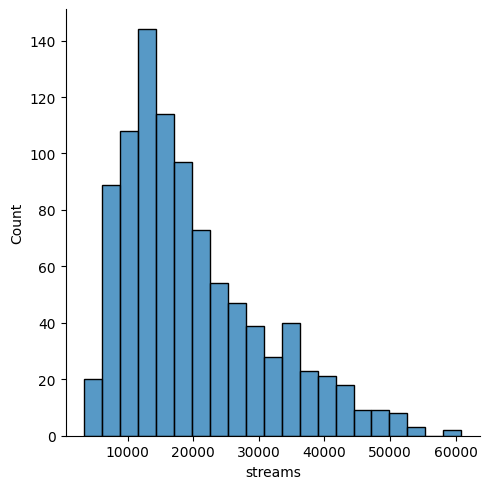

In [4]:
sns.displot(squared_songs)

In [6]:
from scipy.stats import boxcox

bc_result = boxcox(songs_2.streams)
boxcox_streams = bc_result[0]
lam = bc_result[1]
lam

0.014172313182996624

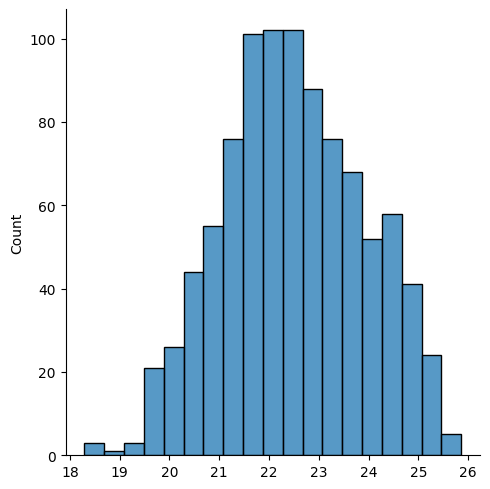

In [9]:
sns.displot(boxcox_streams)

We can see that Box cox gives great results too.

We remain with the following tasks:
- Encode "key" and "mode" into numbers
- Standardize our independent variables by selecting an appropriate method.
- Look at the correlation of the dependent variable with the independent variables both visually and statistically.

In [72]:
#We shall create a new dataset and use one-hot encoding to transform categorical variables.
songs_encoded = pd.get_dummies(songs_2, columns=['key', 'mode'], drop_first=True, dtype="int64")
songs_encoded.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,key_no_data,mode_Minor
33,Anti-Hero,Taylor Swift,1,2022,10,21,9082,56,999748277,242,...,0,0,0,1,0,0,0,0,0,0
625,Arcade,Duncan Laurence,1,2019,3,7,6646,0,991336132,107,...,0,0,0,0,0,0,0,0,0,1
253,Glimpse of Us,Joji,1,2022,6,10,6330,6,988515741,109,...,0,0,0,0,0,0,0,1,0,0
455,Seek & Destroy,SZA,1,2022,12,9,1007,0,98709329,5,...,1,0,0,0,0,0,0,0,0,0
98,Summertime Sadness,Lana Del Rey,1,2011,1,1,20333,52,983637508,89,...,1,0,0,0,0,0,0,0,0,1


Let's note the fact that in mode_Minor, 0 means Major.

In [67]:
songs_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946 entries, 33 to 301
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   track_name               946 non-null    object 
 1   artist(s)_name           946 non-null    object 
 2   artist_count             946 non-null    int64  
 3   released_year            946 non-null    int64  
 4   released_month           946 non-null    int64  
 5   released_day             946 non-null    int64  
 6   in_spotify_playlists     946 non-null    int64  
 7   in_spotify_charts        946 non-null    int64  
 8   streams                  946 non-null    int64  
 9   in_apple_playlists       946 non-null    int64  
 10  in_apple_charts          946 non-null    int64  
 11  in_deezer_playlists      946 non-null    int64  
 12  in_deezer_charts         946 non-null    int64  
 13  in_shazam_charts         946 non-null    int64  
 14  bpm                      946 n

We remain with the following tasks:
- Standardize our independent variables by selecting an appropriate method.
- Look at the correlation of the dependent variable with the independent variables both visually and statistically.

In [73]:
songs_encoded.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'log_transformed_streams', 'original_streams', 'key_A#', 'key_B',
       'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#',
       'key_G', 'key_G#', 'key_no_data', 'mode_Minor'],
      dtype='object')

In [74]:
songs_encoded_2 = songs_encoded.drop(["streams", "original_streams"], axis=1)
songs_encoded_2.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'log_transformed_streams', 'key_A#', 'key_B', 'key_C', 'key_C#',
       'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#',
       'key_no_data', 'mode_Minor'],
      dtype='object')

In [75]:
#Even if we will probably end up dropping the index column, let's transform each trax-artist combination
#Into an unique index (we should have done this at the beginning, when cleaning the data)
songs_encoded_2['track_artist_combined'] = songs_encoded_2['track_name'] + '_' + songs_encoded_2['artist(s)_name']
songs_encoded_2['track_artist_index'] = songs_encoded_2['track_artist_combined'].astype('category').cat.codes.astype('int64')
songs_encoded_3 = songs_encoded_2.drop(["track_name", "artist(s)_name", "track_artist_combined"], axis=1)
songs_encoded_3.columns

Index(['artist_count', 'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
       'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts',
       'in_shazam_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%',
       'log_transformed_streams', 'key_A#', 'key_B', 'key_C', 'key_C#',
       'key_D', 'key_D#', 'key_E', 'key_F', 'key_F#', 'key_G', 'key_G#',
       'key_no_data', 'mode_Minor', 'track_artist_index'],
      dtype='object')

In [76]:
songs_encoded_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946 entries, 33 to 301
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   artist_count             946 non-null    int64  
 1   released_year            946 non-null    int64  
 2   released_month           946 non-null    int64  
 3   released_day             946 non-null    int64  
 4   in_spotify_playlists     946 non-null    int64  
 5   in_spotify_charts        946 non-null    int64  
 6   in_apple_playlists       946 non-null    int64  
 7   in_apple_charts          946 non-null    int64  
 8   in_deezer_playlists      946 non-null    int64  
 9   in_deezer_charts         946 non-null    int64  
 10  in_shazam_charts         946 non-null    int64  
 11  bpm                      946 non-null    int64  
 12  danceability_%           946 non-null    int64  
 13  valence_%                946 non-null    int64  
 14  energy_%                 946 n

Now all the variables are "int64", except for the target variable, which is a "float64" because it's in logaritmic scale.

Before proceding with standardization, let' see what are the features that may influence our target variable the most.

In [95]:
songs_corr = songs_encoded_3.corr()['log_transformed_streams'][:-1] # -1 means that the latest row is log_transformed_streams
top_features = songs_corr[abs(songs_corr) > 0.1].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} correlated values with log_transformed_streams:\n{}".format(len(top_features), top_features))

There is 10 correlated values with log_transformed_streams:
log_transformed_streams    1.000000
in_spotify_playlists       0.669844
in_apple_playlists         0.651342
in_deezer_playlists        0.441467
in_apple_charts            0.309163
in_deezer_charts           0.216163
in_spotify_charts          0.184785
speechiness_%             -0.117865
artist_count              -0.140075
released_year             -0.265396
Name: log_transformed_streams, dtype: float64


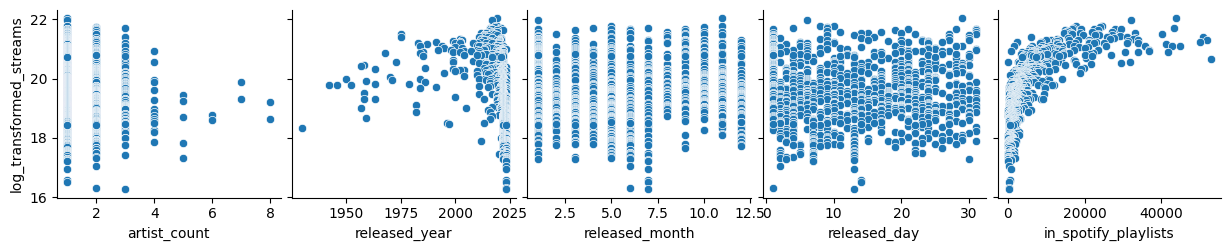

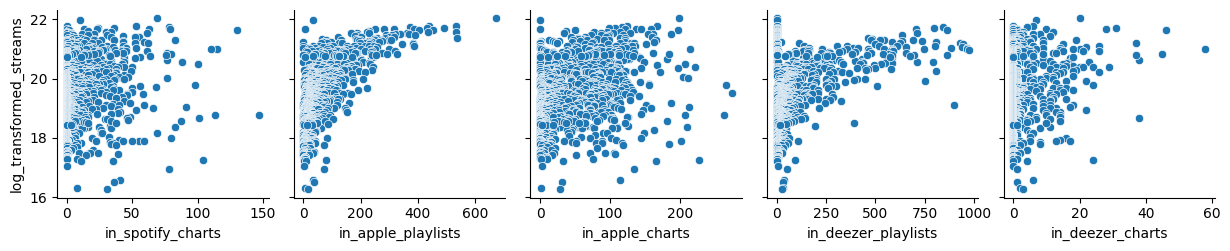

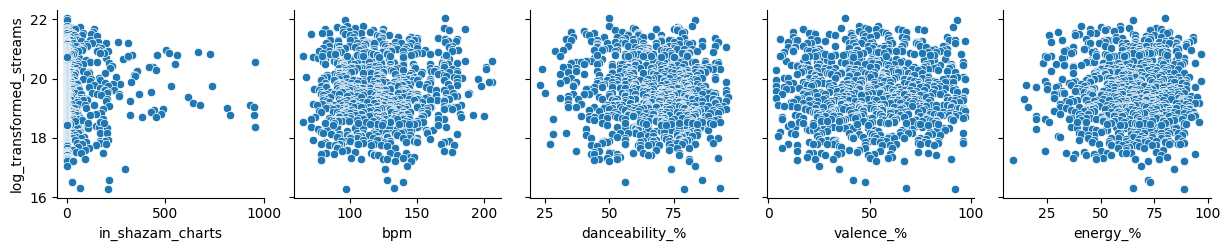

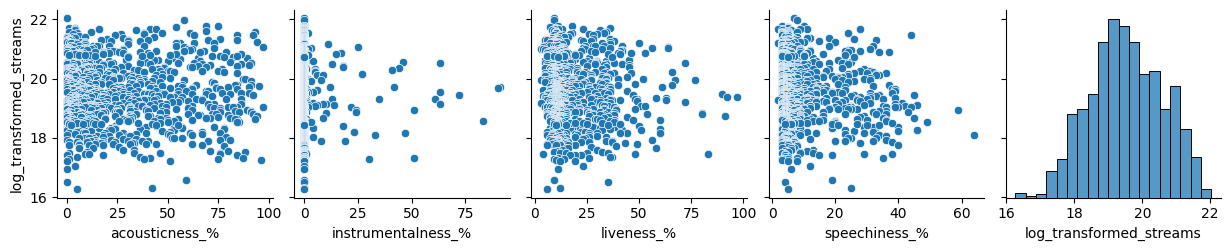

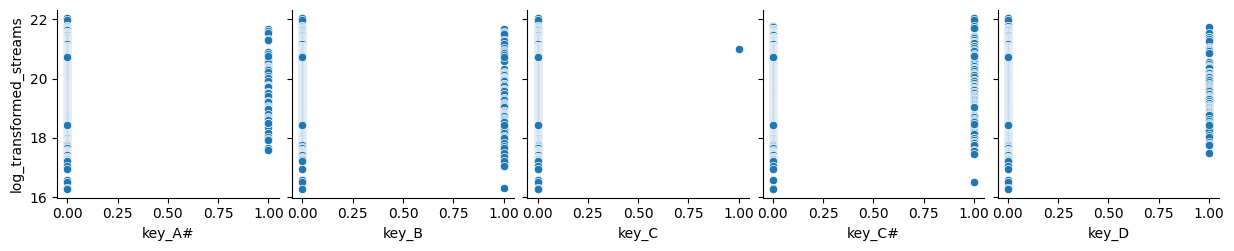

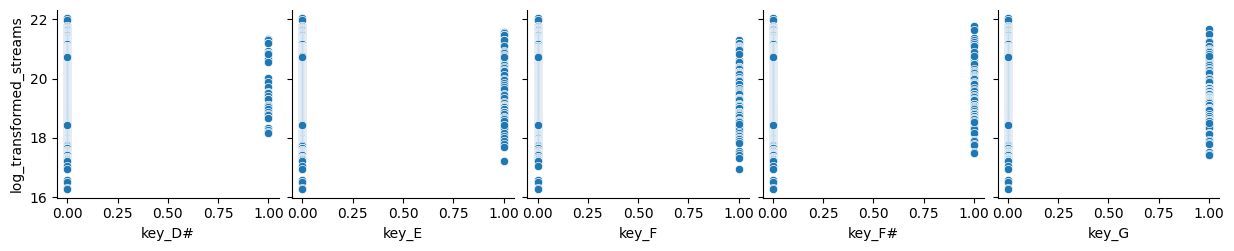

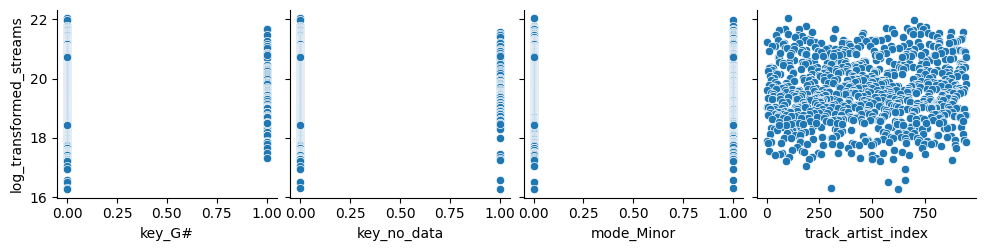

In [80]:
for i in range (0,len(songs_encoded_3.columns), 5):
    sns.pairplot(data=songs_encoded_3,
                 x_vars=songs_encoded_3.columns[i:i+5],
                 y_vars=['log_transformed_streams'])

<Axes: >

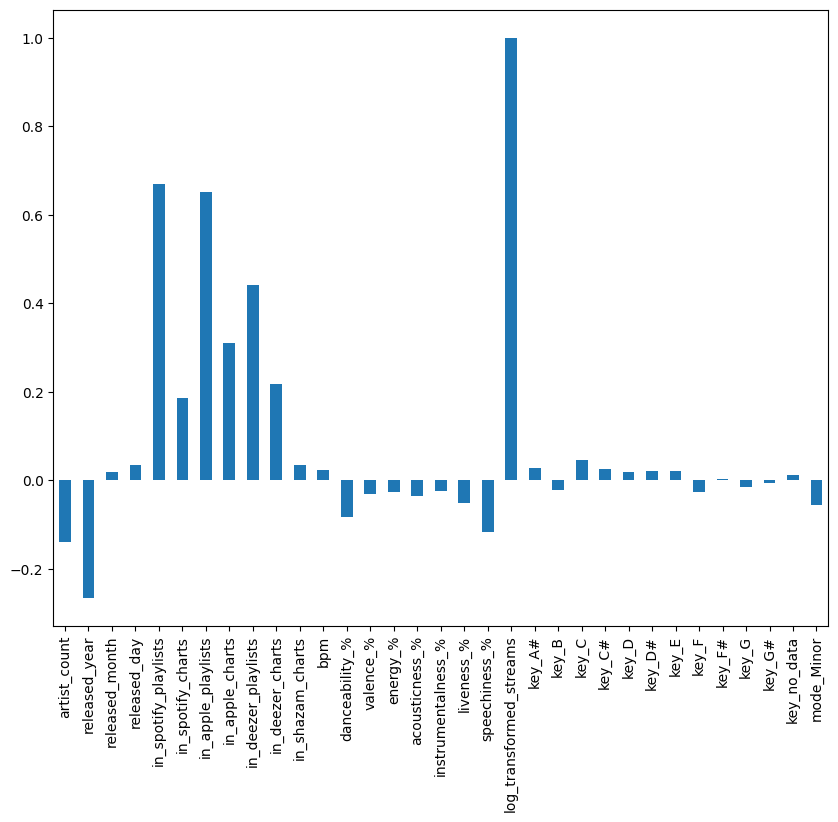

In [82]:
songs_corr.plot(kind="bar",figsize=(10,8))

<Axes: >

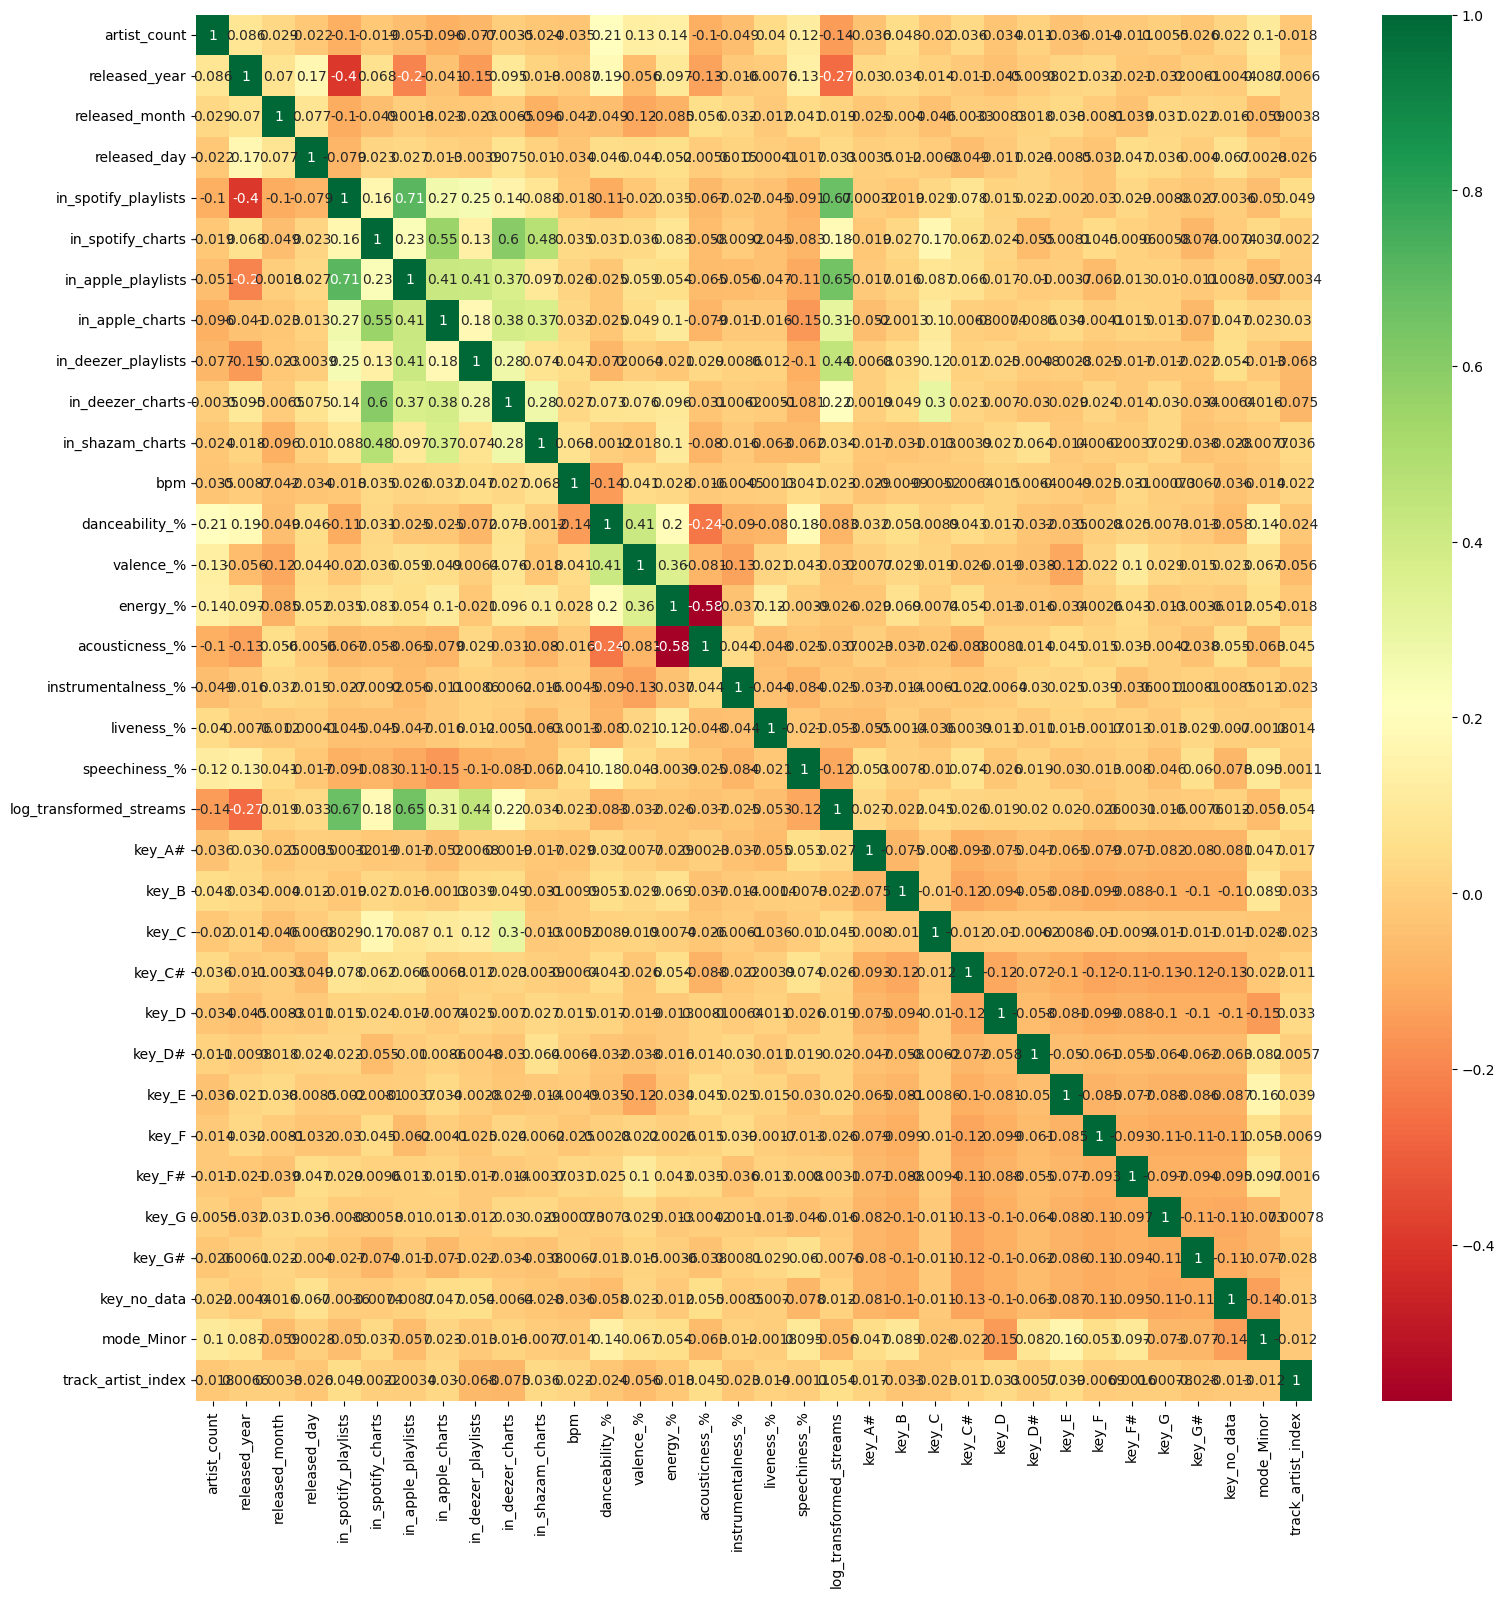

In [85]:
plt.figure(figsize=(18,18))
sns.heatmap(songs_encoded_3.corr(),annot=True,cmap="RdYlGn")

Interestingly, features like danceability, liveness, energy, valence, instrumentalness, speechinsess and danceability have a very low negative correlation with the number of streams.

Since we have many encoded variables, let's double check our correlations by using the point-biserial correlation.

In [90]:
from scipy.stats import pointbiserialr

# Assuming 'log_transformed_streams' is your target column
target_column = songs_encoded_3['log_transformed_streams']

# Create an empty list to store correlation results
correlation_results = []

# Iterate through columns
for column in songs_encoded_3.columns:
    if column != 'log_transformed_streams':  # Skip the target column itself
        # Calculate point-biserial correlation
        correlation_coefficient, p_value = pointbiserialr(songs_encoded_3[column], target_column)
        
        # Append results to the list
        correlation_results.append({
            'Column': column,
            'Correlation Coefficient': correlation_coefficient,
            'P-value': p_value
        })

# Create a DataFrame from the list of results
correlation_df = pd.DataFrame(correlation_results)

# Display the results
print(correlation_df)

                  Column  Correlation Coefficient        P-value
0           artist_count                -0.140075   1.532567e-05
1          released_year                -0.265396   1.029391e-16
2         released_month                 0.018517   5.694763e-01
3           released_day                 0.033011   3.104610e-01
4   in_spotify_playlists                 0.669844  3.360683e-124
5      in_spotify_charts                 0.184785   1.032370e-08
6     in_apple_playlists                 0.651342  2.700444e-115
7        in_apple_charts                 0.309163   2.119761e-22
8    in_deezer_playlists                 0.441467   2.139843e-46
9       in_deezer_charts                 0.216163   1.825370e-11
10      in_shazam_charts                 0.033601   3.018806e-01
11                   bpm                 0.022777   4.841019e-01
12        danceability_%                -0.082959   1.069241e-02
13             valence_%                -0.031703   3.300263e-01
14              energy_% 

In [94]:
# Display the results
print(correlation_df[abs(correlation_df['Correlation Coefficient'])> 0.1])

                  Column  Correlation Coefficient        P-value
0           artist_count                -0.140075   1.532567e-05
1          released_year                -0.265396   1.029391e-16
4   in_spotify_playlists                 0.669844  3.360683e-124
5      in_spotify_charts                 0.184785   1.032370e-08
6     in_apple_playlists                 0.651342  2.700444e-115
7        in_apple_charts                 0.309163   2.119761e-22
8    in_deezer_playlists                 0.441467   2.139843e-46
9       in_deezer_charts                 0.216163   1.825370e-11
18         speechiness_%                -0.117865   2.800750e-04


In [97]:
top_features = songs_corr[abs(songs_corr) > 0.1].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} correlated values with log_transformed_streams:\n{}".format(len(top_features), top_features))

There is 10 correlated values with log_transformed_streams:
log_transformed_streams    1.000000
in_spotify_playlists       0.669844
in_apple_playlists         0.651342
in_deezer_playlists        0.441467
in_apple_charts            0.309163
in_deezer_charts           0.216163
in_spotify_charts          0.184785
speechiness_%             -0.117865
artist_count              -0.140075
released_year             -0.265396
Name: log_transformed_streams, dtype: float64


We shall keep just these 9 dependent variables for our linear regression.

In [104]:
features_to_keep = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists',
       'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts','speechiness_%',
                    'artist_count', 'released_year','log_transformed_streams']

In [111]:
songs_3 = songs_encoded_3[features_to_keep]
songs_3.head(5)

,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,speechiness_%,artist_count,released_year,log_transformed_streams
33,9082,56,242,142,165,9,5,1,2022,20.723014
625,6646,0,107,47,584,1,4,1,2019,20.714564
253,6330,6,109,42,158,3,5,1,2022,20.711715
455,1007,0,5,31,1,0,7,1,2022,18.407690
98,20333,52,89,143,0,3,3,1,2011,20.706768


In [112]:
songs_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 946 entries, 33 to 301
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   in_spotify_playlists     946 non-null    int64  
 1   in_spotify_charts        946 non-null    int64  
 2   in_apple_playlists       946 non-null    int64  
 3   in_apple_charts          946 non-null    int64  
 4   in_deezer_playlists      946 non-null    int64  
 5   in_deezer_charts         946 non-null    int64  
 6   speechiness_%            946 non-null    int64  
 7   artist_count             946 non-null    int64  
 8   released_year            946 non-null    int64  
 9   log_transformed_streams  946 non-null    float64
dtypes: float64(1), int64(9)
memory usage: 113.6 KB


In [113]:
songs_3.to_pickle('songs_3.pkl')

In [21]:
songs_3 = pd.read_pickle('songs_3.pkl')

One of the risks of keeping these features is that it might be an autocorrelation between the number of streams and the presence of the song in the charts and playlist. This is because, a song that is highly popular, is known by more people, that by consequence may put it in their playlist. On the other hand, there might be a prendictive valence, since a song that is more playlist and charts is also more easily discoverable by people that previously don't know that song. A third point I want to make is that, once a song becomes more popular it creates a snowball effect that results in the song being included in more playlist, then becoming more discoverable and popular. Therefore, even if there is some ambiguity when interpreting this "chicken-egg" situation, this is a phenomenon that cannot be ignored, and therefore, we shall build a predictive model based on it.

Since we have many independent variables and we don't know the distribution of each, we choose RobustScaler to standadize the independend variables in a way that is resistant to outliers. Moreover, we shoud expect outliers when considering the number of mentions of a song in a playlist.

In [24]:
from sklearn.preprocessing import RobustScaler

# Extract the column names of features (excluding 'log_transformed_streams')
features_to_standardize = songs_3.columns.difference(['log_transformed_streams','released_year', 'artist_count'])

# Create a RobustScaler instance
robust_scaler = RobustScaler()

# Standardize the selected features using RobustScaler
standardized_features = pd.DataFrame(robust_scaler.fit_transform(songs_3[features_to_standardize]),
                                      columns=features_to_standardize)

# Add 'log_transformed_streams' column to the standardized features
standardized_features['log_transformed_streams'] = songs_3['log_transformed_streams']
standardized_features['released_year'] = songs_3['released_year']
standardized_features['artist_count'] = songs_3['artist_count']

# Display the new DataFrame with standardized features
standardized_features.head(5)

,in_apple_charts,in_apple_playlists,in_deezer_charts,in_deezer_playlists,in_spotify_charts,in_spotify_playlists,speechiness_%,log_transformed_streams,released_year,artist_count
0,1.29375,2.782609,4.5,1.460490,3.3125,1.420183,-0.142857,18.766974,2023.0,2.0
1,0.10625,0.976589,0.5,6.027248,-0.1875,0.915653,-0.285714,18.711231,2023.0,1.0
2,0.04375,1.003344,1.5,1.384196,0.1875,0.850205,-0.142857,18.757181,2023.0,1.0
3,-0.09375,-0.387960,0.0,-0.326975,-0.1875,-0.252265,0.142857,20.501173,2019.0,1.0
4,1.30625,0.735786,1.5,-0.337875,3.0625,3.750427,-0.428571,19.530023,2023.0,1.0


At the end, I did not standardize 'released_year' and 'artist_count', becuase some of the values became 0 in the standardization.

In [25]:
standardized_features.to_pickle('standardized_features.pkl')

In [20]:
standardized_features = pd.read_pickle('standardized_features.pkl')

Text(0.5, 1.0, 'Total Missing Values')

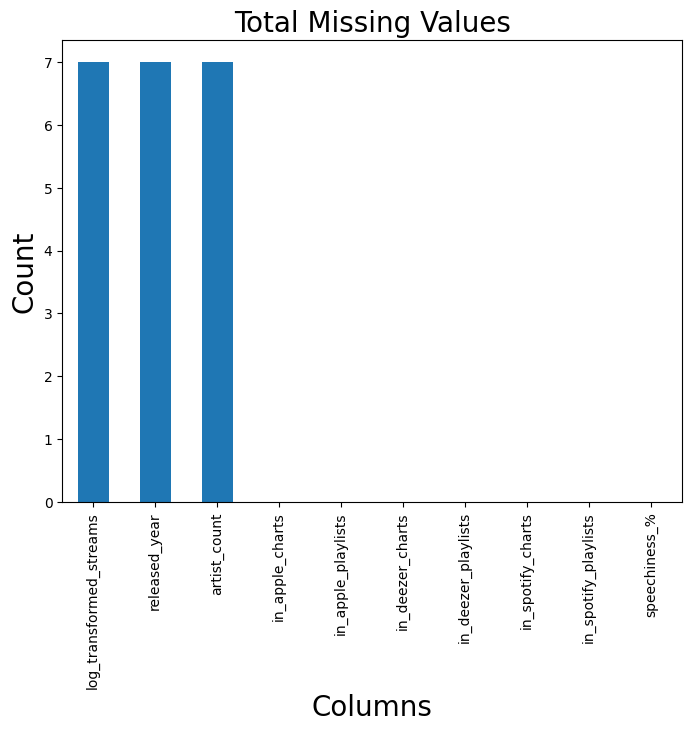

In [26]:
#Let's look for null values, since some null values might be preventing certain features from being seen as numeric.
#Now we will see if there is missing value, even if we have already filled the missing values above
total_missing = standardized_features.isnull().sum().sort_values(ascending=False)
total_missing_select = total_missing.head(20)
total_missing_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [29]:
#Let's check if there are columns where the target variable got transformed into 0
total_zero = standardized_features[standardized_features['log_transformed_streams'] == 0]
total_zero.count()

in_apple_charts            0
in_apple_playlists         0
in_deezer_charts           0
in_deezer_playlists        0
in_spotify_charts          0
in_spotify_playlists       0
speechiness_%              0
log_transformed_streams    0
released_year              0
artist_count               0
dtype: int64

In [30]:
songs_4 = songs_3.dropna(subset=['log_transformed_streams']).reset_index(drop=True)
songs_4.head()

,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,speechiness_%,artist_count,released_year,log_transformed_streams
0,9082,56,242,142,165,9,5,1,2022,20.723014
1,6646,0,107,47,584,1,4,1,2019,20.714564
2,6330,6,109,42,158,3,5,1,2022,20.711715
3,1007,0,5,31,1,0,7,1,2022,18.407690
4,20333,52,89,143,0,3,3,1,2011,20.706768


Text(0.5, 1.0, 'Total Missing Values')

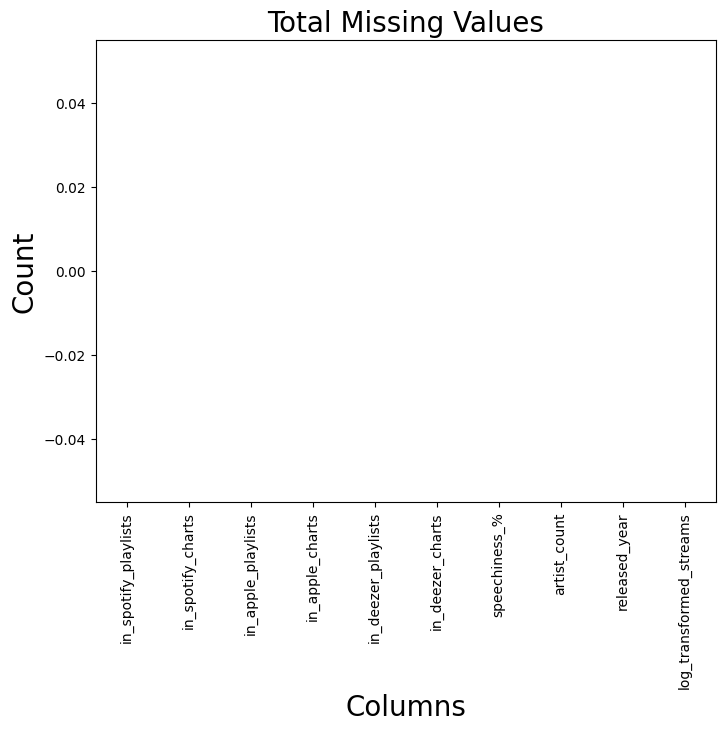

In [34]:
#Let's look for null values, since some null values might be preventing certain features from being seen as numeric.
#Now we will see if there is missing value, even if we have already filled the missing values above
total_missing = songs_4.isnull().sum().sort_values(ascending=False)
total_missing_select = total_missing.head(20)
total_missing_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [43]:
songs_4.to_pickle('songs_4.pkl')

In [25]:
songs_4 = pd.read_pickle("songs_4.pkl")

We've dealt with the missing values that formed during the teansformation process.

In [4]:
#Let's load the packages used for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [26]:
lr = LinearRegression()

In [85]:
#Define and load the predictor (X) and Target(y) variables
y_col = "log_transformed_streams"

X = songs_4.drop(y_col, axis=1)
y = songs_4[y_col]


In [86]:
#Create polynomial features
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

In [87]:
#Split the data into the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=42)

Since we have applied the log transformation to the target variable, we shall apply the same to y_train.

In [88]:
#y_train_log = np.log(y_train)
#y_train_log.shape

In [89]:
#lr.fit(X_train, y_train_log)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

Let's apply an inverse transformation to be shure we worked with the right data.

In [43]:
streams_reverted = np.exp(songs_4['log_transformed_streams']).astype("int64")
streams_reverted.values[:10]

array([999748277, 991336132, 988515740,  98709329, 983637507,  97610446,
       972509631, 972164968,  96273745,  96180276], dtype=int64)

In [35]:
songs_2 = pd.read_pickle('songs_2.pkl')

In [36]:
songs_2['streams'].values[:10]

array([999748277, 991336132, 988515741,  98709329, 983637508,  97610446,
       972509632, 972164968,  96273746,  96180277], dtype=int64)

Let's test the model with R^2. The R squared is the coefficient of determination, which is the proportion of the variation in the dependent variable that is predictable from the independent variables. The closer is R squared to 1, the better is the fit of the model.

In [90]:
r2_score(y_test,y_pred)

0.6795531830346717

In [91]:
mean_squared_error(y_test, y_pred)

0.3663696305113821

Now we will check the mean squared error. The MSE measures the average of the squares of the errors, that is, the average squared difference between the estimated values and the actual values using the test data.

As we can see, our model is not doing very well. This can be due to several reasons. For example, we may want to chose other models. However, looking back at out variables, we may havy have violated some requisites for linear regression. Many independent variables are probably correlated, then violating the multicollinearity requisite. We also want to check the linearity assumption.

<Axes: >

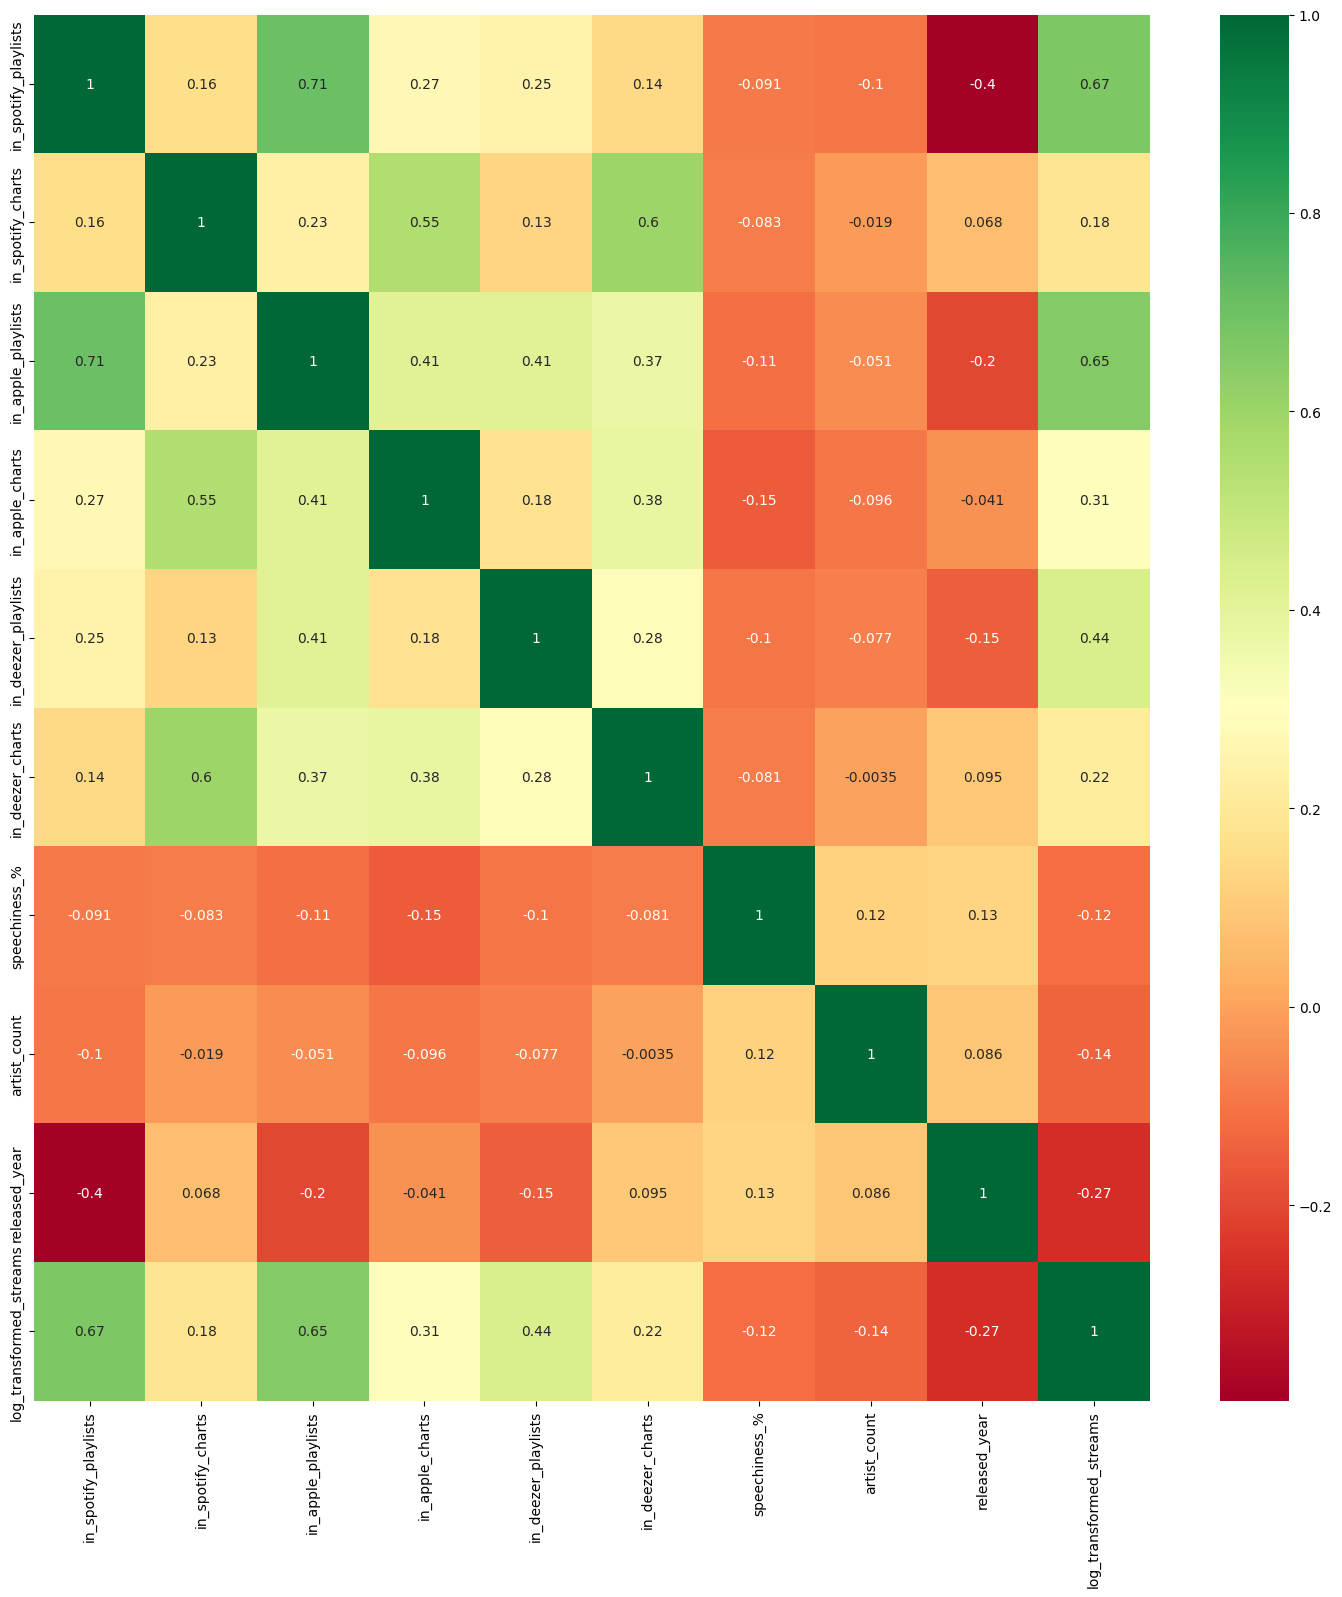

In [61]:
plt.figure(figsize=(18,18))
sns.heatmap(songs_4.corr(),annot=True,cmap="RdYlGn")

We see that our strongest independent variable "in_spotify_playlist" is highly correlated with "in_apple_playlists", and "in_spotify_charts" is strongly correlated with "in_apple_charts", and "in_deezer_charts", so we can drop these features. 

In [66]:
songs_5 = songs_4.drop(["in_apple_playlists","in_apple_charts","in_deezer_charts"], axis=1)
songs_5.columns

Index(['in_spotify_playlists', 'in_spotify_charts', 'in_deezer_playlists',
       'speechiness_%', 'artist_count', 'released_year',
       'log_transformed_streams'],
      dtype='object')

Let's check for linearity.

<Axes: xlabel='released_year', ylabel='log_transformed_streams'>

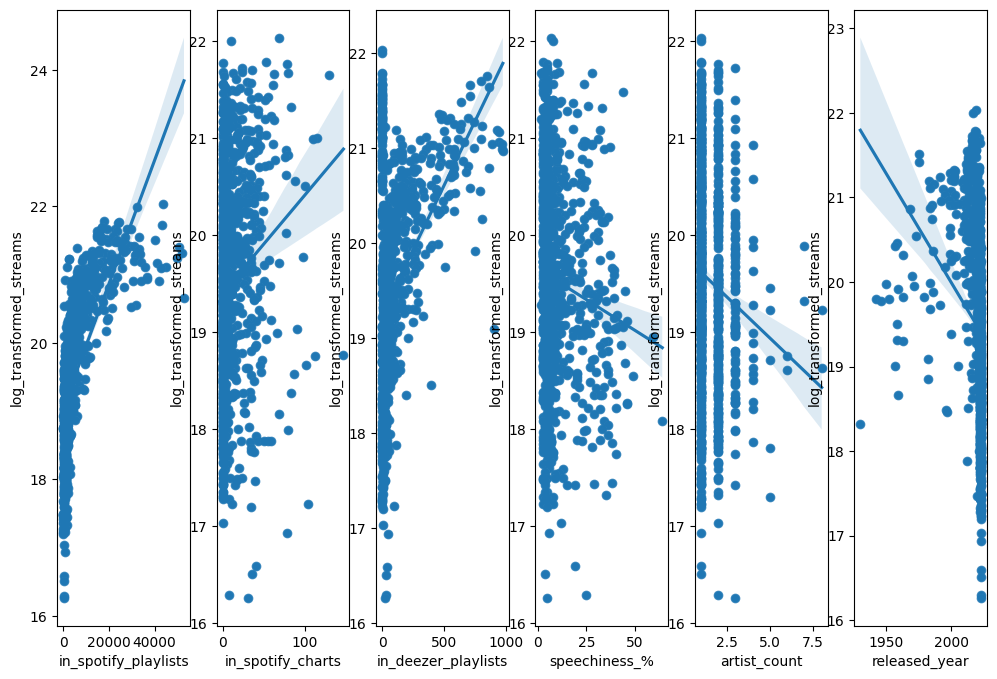

In [70]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(figsize = (12,8), ncols=6,sharey=False)
sns.scatterplot( x = songs_5.in_spotify_playlists, y = songs_5.log_transformed_streams,  ax=ax1)
sns.regplot(x=songs_5.in_spotify_playlists, y=songs_5.log_transformed_streams, ax=ax1)
 
sns.scatterplot(x = songs_5.in_spotify_charts,y = songs_5.log_transformed_streams, ax=ax2)
sns.regplot(x=songs_5.in_spotify_charts, y=songs_5.log_transformed_streams, ax=ax2)

sns.scatterplot(x = songs_5.in_deezer_playlists,y = songs_5.log_transformed_streams, ax=ax3)
sns.regplot(x=songs_5.in_deezer_playlists, y=songs_5.log_transformed_streams, ax=ax3)

sns.scatterplot(x = songs_5['speechiness_%'],y = songs_5.log_transformed_streams, ax=ax4)
sns.regplot(x=songs_5['speechiness_%'], y=songs_5.log_transformed_streams, ax=ax4)

sns.scatterplot(x = songs_5.artist_count,y = songs_5.log_transformed_streams, ax=ax5)
sns.regplot(x=songs_5.artist_count, y=songs_5.log_transformed_streams, ax=ax5)

sns.scatterplot(x = songs_5.released_year,y = songs_5.log_transformed_streams, ax=ax6)
sns.regplot(x=songs_5.released_year, y=songs_5.log_transformed_streams, ax=ax6)


We can see that only "in_spotify_playlists" and "in_deezer_playlists" satisfy linearity, so we can remove the rest.

In [75]:
songs_6 = songs_5.drop(["artist_count","in_spotify_charts","speechiness_%", "released_year"], axis=1)
songs_6.columns

Index(['in_spotify_playlists', 'in_deezer_playlists',
       'log_transformed_streams'],
      dtype='object')

In [76]:
songs_6.to_pickle('songs_6')

In [ ]:
lr = LinearRegression()

In [77]:
#Define and load the predictor (X) and Target(y) variables
y_col = "log_transformed_streams"

X = songs_6.drop(y_col, axis=1)
y = songs_6[y_col]

In [78]:
#Create polynomial features
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

In [79]:
#Split the data into the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, 
                                                    random_state=42)

In [80]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [81]:
r2_score(y_test,y_pred)

0.6731650456578311

In [84]:
mean_squared_error(y_test, y_pred)

0.37367324348707986

The R^2 score is even lower now, and the MSE higher. The R^2 score is equal to the correlation that "in_spotify_playlists" has with the target feature "strams", so we cannot say that our results are satisfactory.

Depending on what we want to achieve, a R^2 score of 0.67 could be acceptable. For example, promoting the behaviour of adding certain songs into Spotify playlist, may cost some money, but with adequate testing, it cannot be categorized as a risky behavior. In this case, and R^2 of 0.67 could be considered enough, since in the worst case scenarion, the music label may lose some money in the tesing phase, for example, concerning paid ads, and terminate the initiative if the test is not successuful. On the other hand, in a medical context, an R^2 of 0.67 would be considered much worse. The same apply for finance.

Said that, this model probably underfits the data, and we may don't have enough features to predict our target variable. Furthermore, we only have one feature that strongly correlates with the target feature. So we might not be able to improve the R^2 score with such a restricred number of variables.

Next steps and considerations:
- A possible next step is further removing outliers from the dataset. The best performing songs, are further removed from the rest, and their success might been influenced by other factors that are out of control, a phenomenom called luck. So, by removing the greatest success from the dataset, we may find some consistent patterns.
- Another next step, is getting a bigger dataset, with more observations and/or with more features. We can also see if in Deezer and Apple Music we obtain similar results in our predictions.
- A possible variation to the analysis, coudld be using Box cox transformation on the target feature, instead of the logaritmic transformation. We could have also used the StandardScaler() method instead of RobustScaler() to perform standard normalization instead of robust normalization in the independent variables. Moreover, to increae simplicity, we could have applied normalization to the train and test datasets directly, instead of doing so in the preparation phase.
- The next step is checking for